<a href="https://colab.research.google.com/github/Aryapersonal/PRODIGY_DS_04/blob/main/Sentiment_analysis_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # **SENTIMENT ANALYSIS USING TWITTER DATASET**

> ### **TASK 4 - PRODIGY INFOTECH DATASCIENCE INTERNSHIP**



> #### **Author : ARYA S**





In [21]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [22]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#load the dataset
from google.colab import files
upload = files.upload()


Saving twitter_validation.csv to twitter_validation (3).csv


In [24]:
#get the data
df =pd.read_csv('twitter_validation.csv')
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [25]:
# Check for missing values
print(df.isnull().sum())

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [26]:
# Drop rows with missing values
df.dropna(inplace=True)

In [35]:
print(df.columns)

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [41]:
#rename the column
if 'text' not in df.columns:
    df = df.rename(columns={'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})
if 'sentiment' not in df.columns:
    df = df.rename(columns={'Irrelevant': 'sentiment'})

In [42]:
# Function to clean the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return ' '.join(word for word in text.split() if word not in stopwords.words('english'))

In [43]:
# Apply the cleaning function to the text column
df['clean_text'] = df['text'].apply(clean_text)

In [44]:
# Display the cleaned text
print(df[['text', 'clean_text']].head())

                                                text  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...   
1  @Microsoft Why do I pay for WORD when it funct...   
2  CSGO matchmaking is so full of closet hacking,...   
3  Now the President is slapping Americans in the...   
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...   

                                          clean_text  
0  bbc news amazon boss jeff bezos rejects claims...  
1               pay word functions poorly chromebook  
2  csgo matchmaking full closet hacking truly awf...  
3  president slapping americans face really commi...  
4  hi ive madeleine mccann cellar past years litt...  


In [45]:
# Step 4: Sentiment Analysis Model
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])


In [47]:
# Define the target variable
y = df['sentiment']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [49]:
# Make predictions
y_pred = model.predict(X_test)


In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.45
              precision    recall  f1-score   support

  Irrelevant       0.43      0.27      0.33        37
    Negative       0.48      0.62      0.54        52
     Neutral       0.53      0.29      0.37        59
    Positive       0.39      0.60      0.47        52

    accuracy                           0.45       200
   macro avg       0.46      0.44      0.43       200
weighted avg       0.47      0.45      0.44       200



### Accuracy

*  The model achieved an accuracy of 0.45 (45%).
*  This indicates that 45% of the tweets in the test set were correctly classified.




In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.43      0.27      0.33        37
    Negative       0.48      0.62      0.54        52
     Neutral       0.53      0.29      0.37        59
    Positive       0.39      0.60      0.47        52

    accuracy                           0.45       200
   macro avg       0.46      0.44      0.43       200
weighted avg       0.47      0.45      0.44       200



### Insights from Classification Report

- The model performs best in identifying **Negative** tweets with the highest F1-score of 0.54.
- The model struggles with **Irrelevant** and **Neutral** tweets, indicating difficulty in distinguishing between these classes.
- **Positive** tweets have a moderate F1-score, suggesting a balanced trade-off between precision and recall.


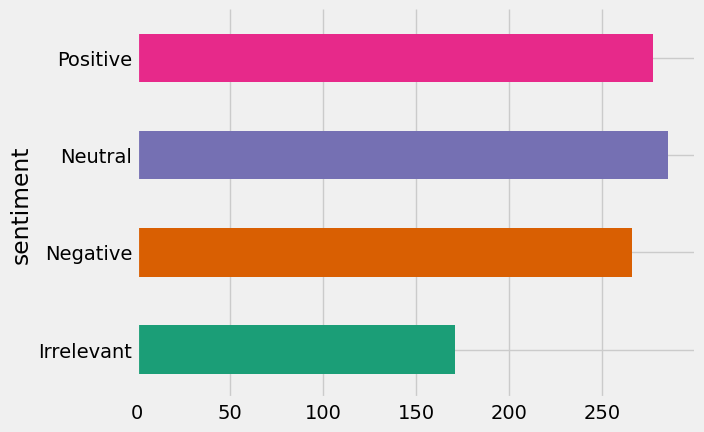

In [61]:
# Step 5: Visualizations

# Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


*   Positive and Neutral sentiments have the highest counts, suggesting these sentiments are more prevalent in the dataset.
*  Negative sentiment also has a significant count, though slightly less than Positive and Neutral.
*  Irrelevant sentiment has the lowest count, indicating fewer tweets fall into this category.



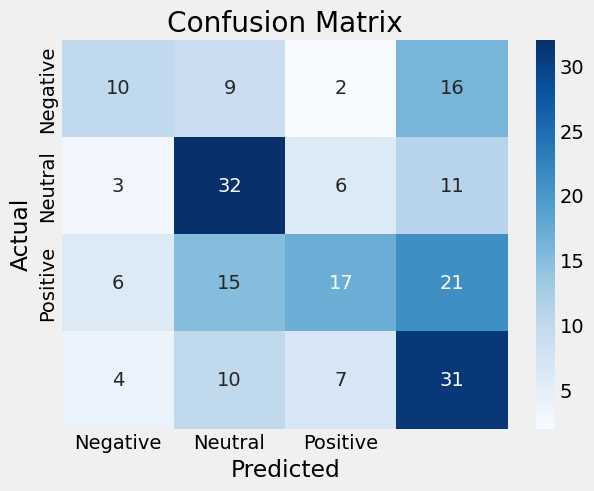

In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



- **Diagonal elements** represent the correct predictions.
- **Off-diagonal elements** represent the incorrect predictions.

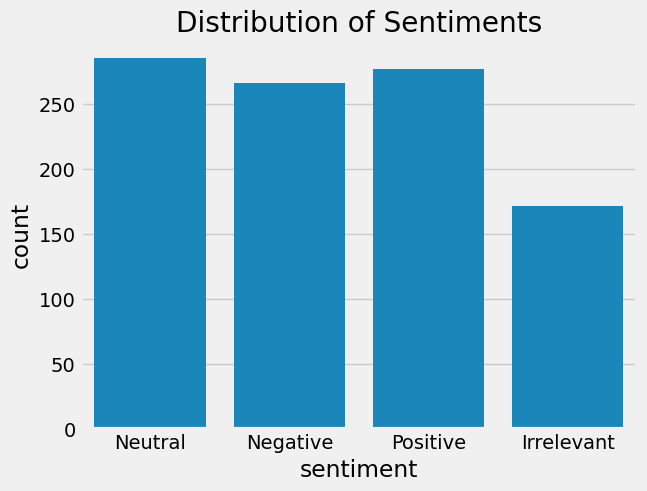

In [52]:
# Distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


- Helps to understand the balance of the dataset.
- Indicates whether there is any class imbalance.


In [53]:
# Word Cloud for each sentiment
from wordcloud import WordCloud

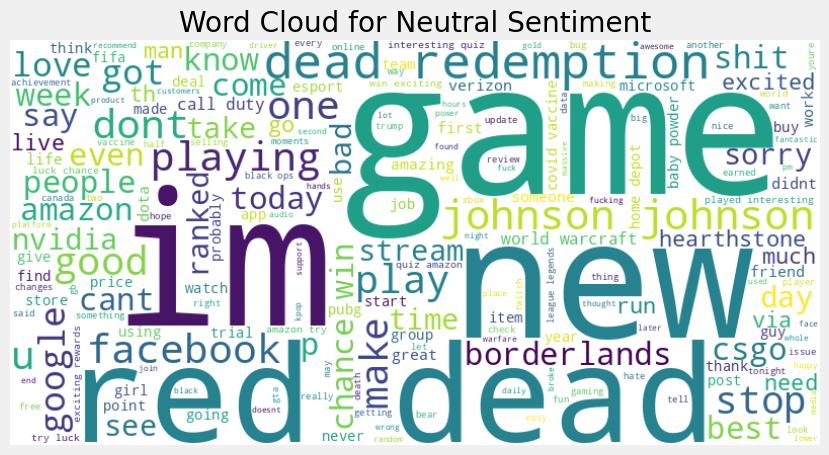

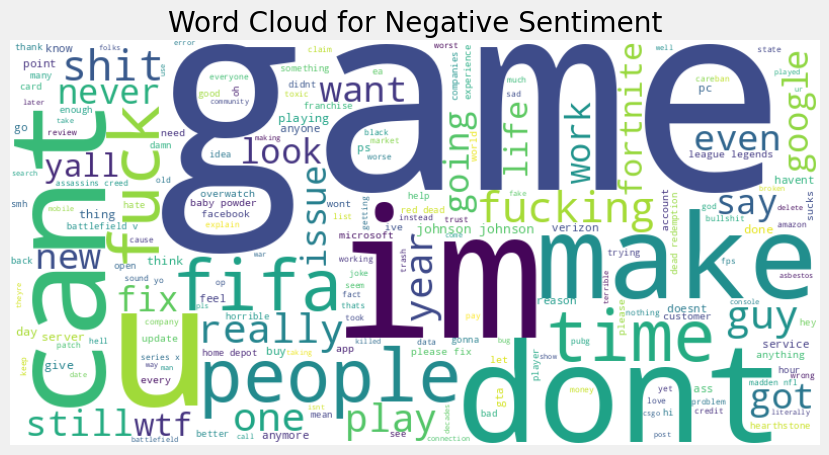

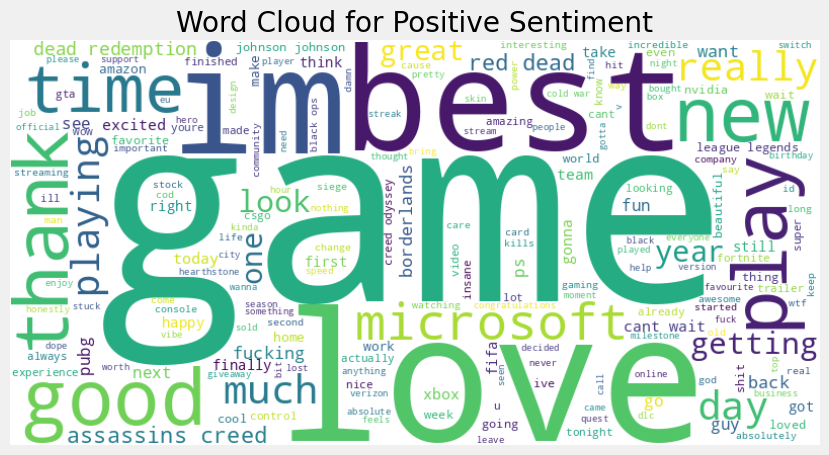

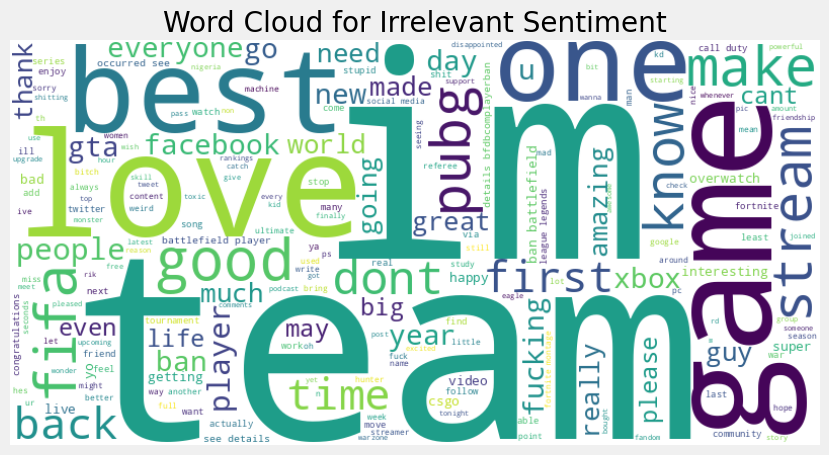

In [54]:
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

- Provides a visual representation of common words associated with each sentiment.
- Useful for understanding the context and common themes in tweets of different sentiments.


## Conclusion

This project demonstrates a basic approach to sentiment analysis using a Naive Bayes classifier on Twitter dataset.The sentiment analysis project using the Twitter dataset provided valuable insights into the distribution and characteristics of sentiments expressed in tweets. Despite the model achieving an accuracy of 45%, several key findings and areas for improvement were identified. While the model showed reasonable performance, the insights gained from the classification report, confusion matrix, sentiment distribution, and word clouds highlight areas for further refinement and improvement.


> Author : ARYA S

> LinkedIn : www.linkedin.com/in/arya-dataanalyst